# Кастомные виджеты
## Изучаем систему Лоренца для дифференциальных уравнений

В этой лекции мы изучим систему Лоренца для дифференциальных уравнений:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

Это одна из классических систем для нелинейных дифференциальных уровнений. В ней можно обнаружить различное поведение уравнений при изменении параметров ($\sigma$, $\beta$, $\rho$).

## Imports

Сначала давайте сделаем импорт из IPython, [NumPy](http://www.numpy.org/), [Matplotlib](http://matplotlib.org/index.html) и [SciPy](http://www.scipy.org/). Если Вы хотите узнать больше об этой части Python, можете посмотреть следующий курс на английском языке: [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)!

In [1]:
%matplotlib inline

In [2]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [3]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

## Вычисление траекторий и отображение результатов на графике

Мы определяем функцию, которая может численно интегрировать дифференциальные уравнения, и затем выводить на графике решения. Эта функция имеет параметры, которые контролируют параметры дифференциального уровнения ($\sigma$, $\beta$, $\rho$), численное интегрирование (`N`, `max_time`) и визуализацию (`angle`).

In [4]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure();
    ax = fig.add_axes([0, 0, 1, 1], projection='3d');
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N));

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        _ = plt.setp(lines, linewidth=2);

    ax.view_init(30, angle)
    _ = plt.show();

    return t, x_t

Теперь сделаем один вызов функции, чтобы увидеть решения. Для этого набора параметров, можно увидеть что траектории закручиваются вокруг двух точек, которые называются аттракторы. 

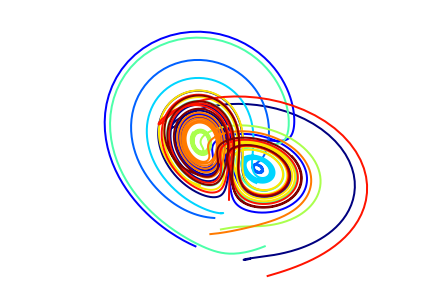

In [5]:
t, x_t = solve_lorenz(angle=0, N=10)

С помощью функции `interactive` в IPython, давайте изучим поведение траекторий при изменении различных параметров.

In [6]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w);

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

Объект, который возвращает `interactive`, это объект `Widget`, и он содержит атрибуты -  текущий результат и параметры:

In [7]:
t, x_t = w.result

In [8]:
w.kwargs

{'N': 25,
 'angle': 129.2,
 'max_time': 4.0,
 'sigma': 33.0,
 'beta': 2.6666666666666665,
 'rho': 21.8}

После интерактивной работы, мы можем взять результаты и выполнить дальнейшие вычисления. Например, вычислить средние значения по осям $x$, $y$ и $z$.

In [9]:
xyz_avg = x_t.mean(axis=1)

In [10]:
xyz_avg.shape

(25, 3)

Создаём гистограммы для средних значений по осям (для разных траекторий), они показывают, что в среднем траектории вращаются вокруг аттракторов.

*Замечание: гистограммы будут выглядеть по-другому, если Вы с помощью слайдеров * `interactive` * поменяли значения параметров.*

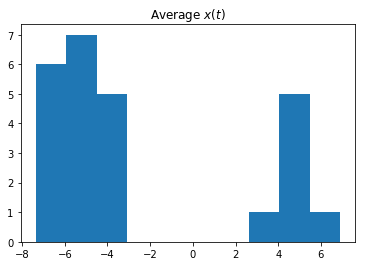

In [11]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');

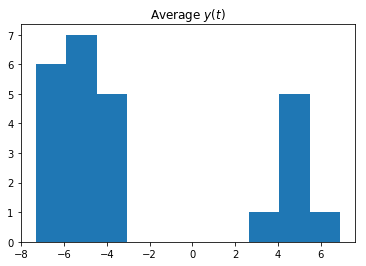

In [12]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$');

# Резюме

Надеюсь что Вам понравилось использовать виджеты в среде Jupyter Notebook, и понравилось изучать возможности пользовательского интерфейса GUI в Python!